In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("mcs_ds_edited_iter_shuffled.csv")
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [3]:
print(df.columns)

X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale']

Index(['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale',
       'sd_ale'],
      dtype='object')


In [4]:
df.isna().sum()


anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64

In [5]:

import plotly.subplots as sp
import plotly.graph_objects as go

# Define your columns (assuming df is already loaded)
X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale', 'sd_ale']

# Create subplots
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=X_columns)

# Add histograms to subplots
for i, col in enumerate(X_columns):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20), row=i//2+1, col=i%2+1)

# Update layout
fig.update_layout(height=1300, width=1200, title="Histograms of Variables", showlegend=False)
fig.show()


In [6]:

from plotly.subplots import make_subplots
# Create subplots: 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, 
                    subplot_titles=("Anchor Ratio", "Trans Range", "Node Density", 
                                    "Iterations", "ALE", "SD ALE"))

# Add each box plot to the subplot
fig.add_trace(go.Box(y=df['anchor_ratio'], name="Anchor Ratio"), row=1, col=1)
fig.add_trace(go.Box(y=df['trans_range'], name="Trans Range"), row=1, col=2)
fig.add_trace(go.Box(y=df['node_density'], name="Node Density"), row=1, col=3)
fig.add_trace(go.Box(y=df['iterations'], name="Iterations"), row=2, col=1)
fig.add_trace(go.Box(y=df['ale'], name="ALE"), row=2, col=2)
fig.add_trace(go.Box(y=df['sd_ale'], name="SD ALE"), row=2, col=3)

# Update layout for better appearance
fig.update_layout(title_text="Box Plots of Various Metrics", 
                  height=600, width=1000,
                  showlegend=False)  # Hide individual legends

# Show the figure
fig.show()


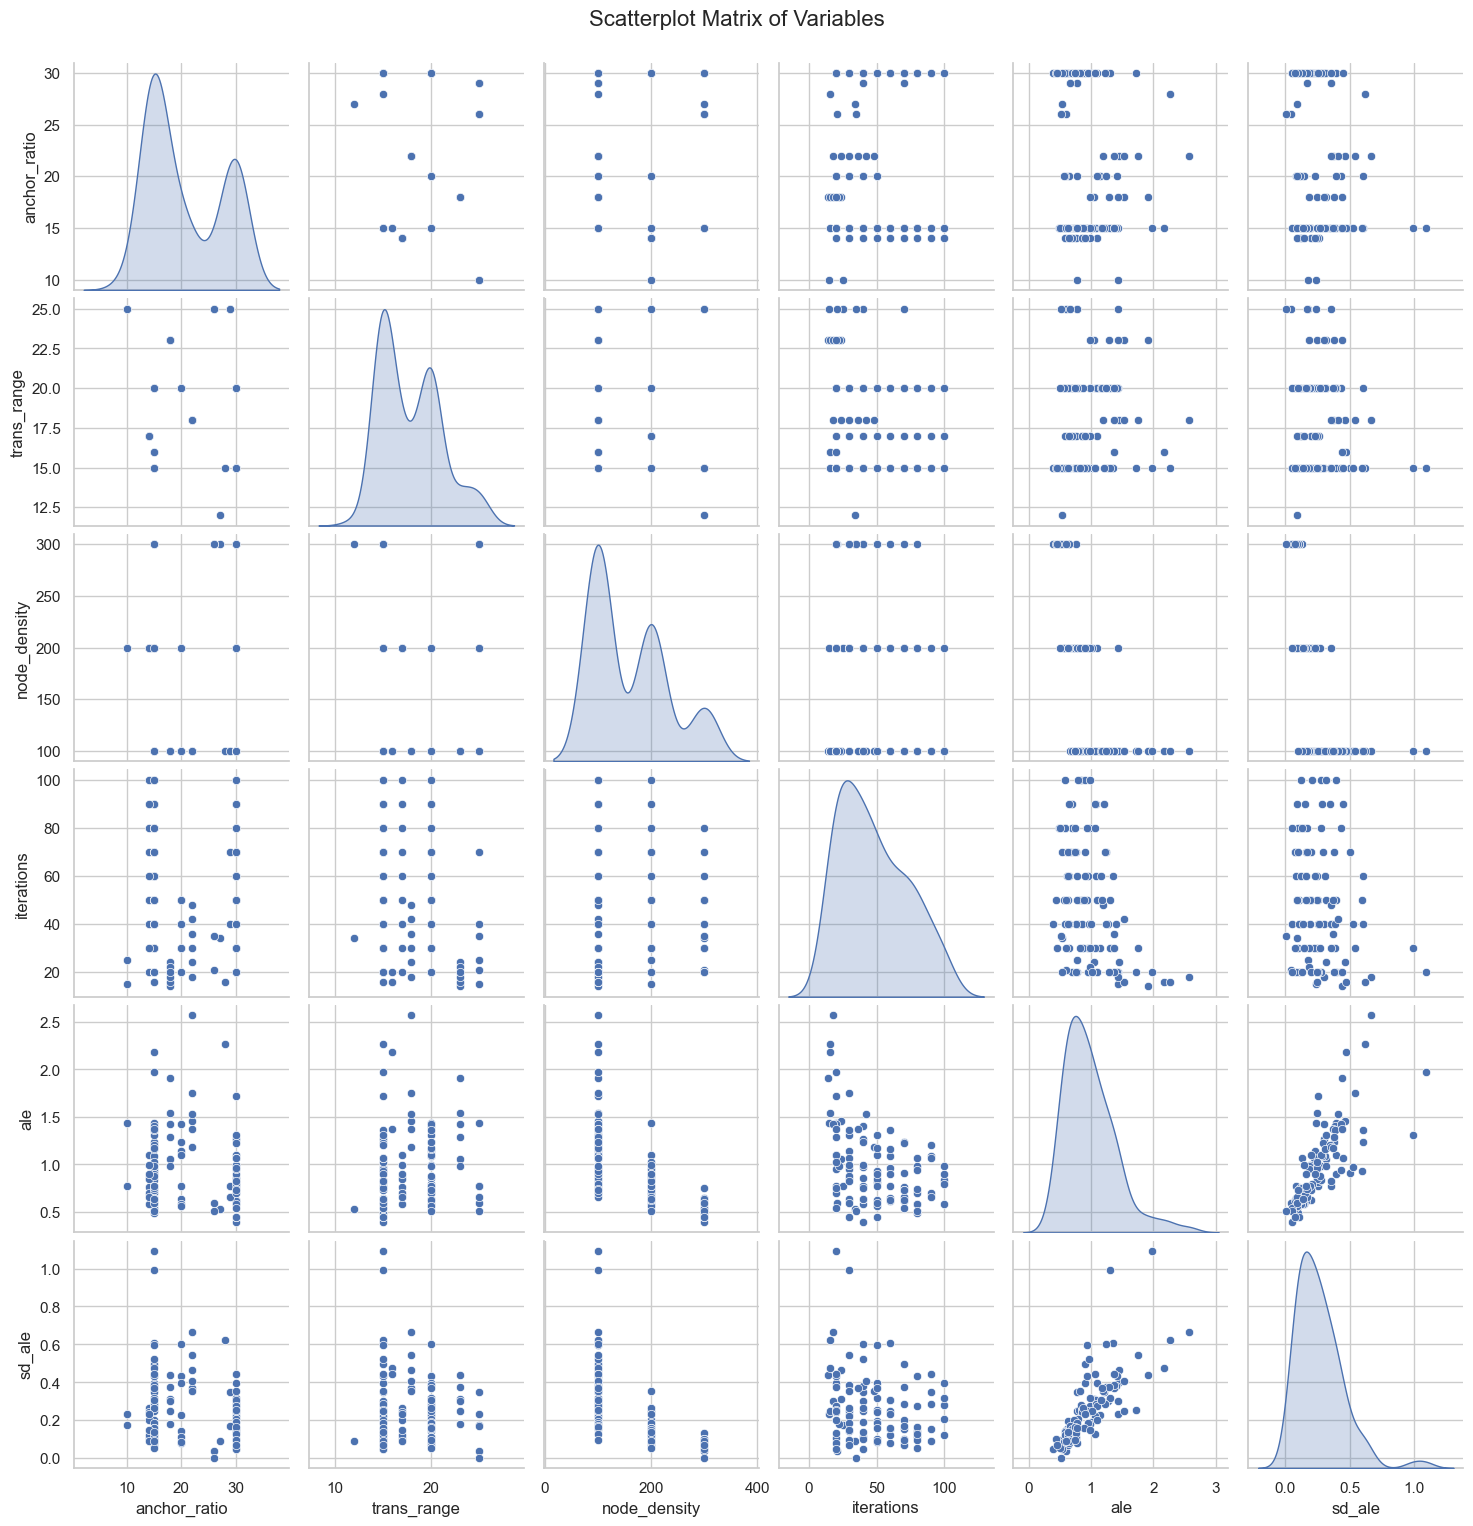

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

# Create a scatterplot matrix (pairplot)
pairplot = sns.pairplot(df[X_columns], diag_kind='kde', palette='Set2', markers='o')

# Customizing the plot
pairplot.fig.suptitle('Scatterplot Matrix of Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()

In [8]:
covariance_matrix = df.corr()
import plotly.express as px
fig = px.imshow(covariance_matrix, 
                text_auto=True,  
                aspect="auto",   
                color_continuous_scale='Viridis', 
                title="Correlation Matrix Heatmap"
)

fig.show()


In [9]:
df.mean()

df[X_columns].cov()
df[X_columns].corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


In [10]:

# Assuming df and X_columns are defined
X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale', 'sd_ale']

# Create subplots grid (number of rows and columns based on X_columns length)
fig = sp.make_subplots(rows=len(X_columns), cols=len(X_columns), shared_xaxes=True, shared_yaxes=True)

# Generate contour plots for each pair of variables
for i, var1 in enumerate(X_columns):
    for j, var2 in enumerate(X_columns):
        if i < j:  # Only create contour plots for lower triangle (i < j)
            contour = go.Histogram2dContour(
                x=df[var2], 
                y=df[var1], 
                colorscale='Plasma', 
                contours=dict(showlabels=True, labelfont=dict(size=10)),
                colorbar=dict(title="Density")
            )
            fig.add_trace(contour, row=i+1, col=j+1)
        else:
            fig.update_xaxes(visible=False, row=i+1, col=j+1)
            fig.update_yaxes(visible=False, row=i+1, col=j+1)

# Update layout
fig.update_layout(
    title="Contour Plots for Each Pair of Variables", 
    height=1200, 
    width=1200, 
    showlegend=False
)

# Show the plot
fig.show()


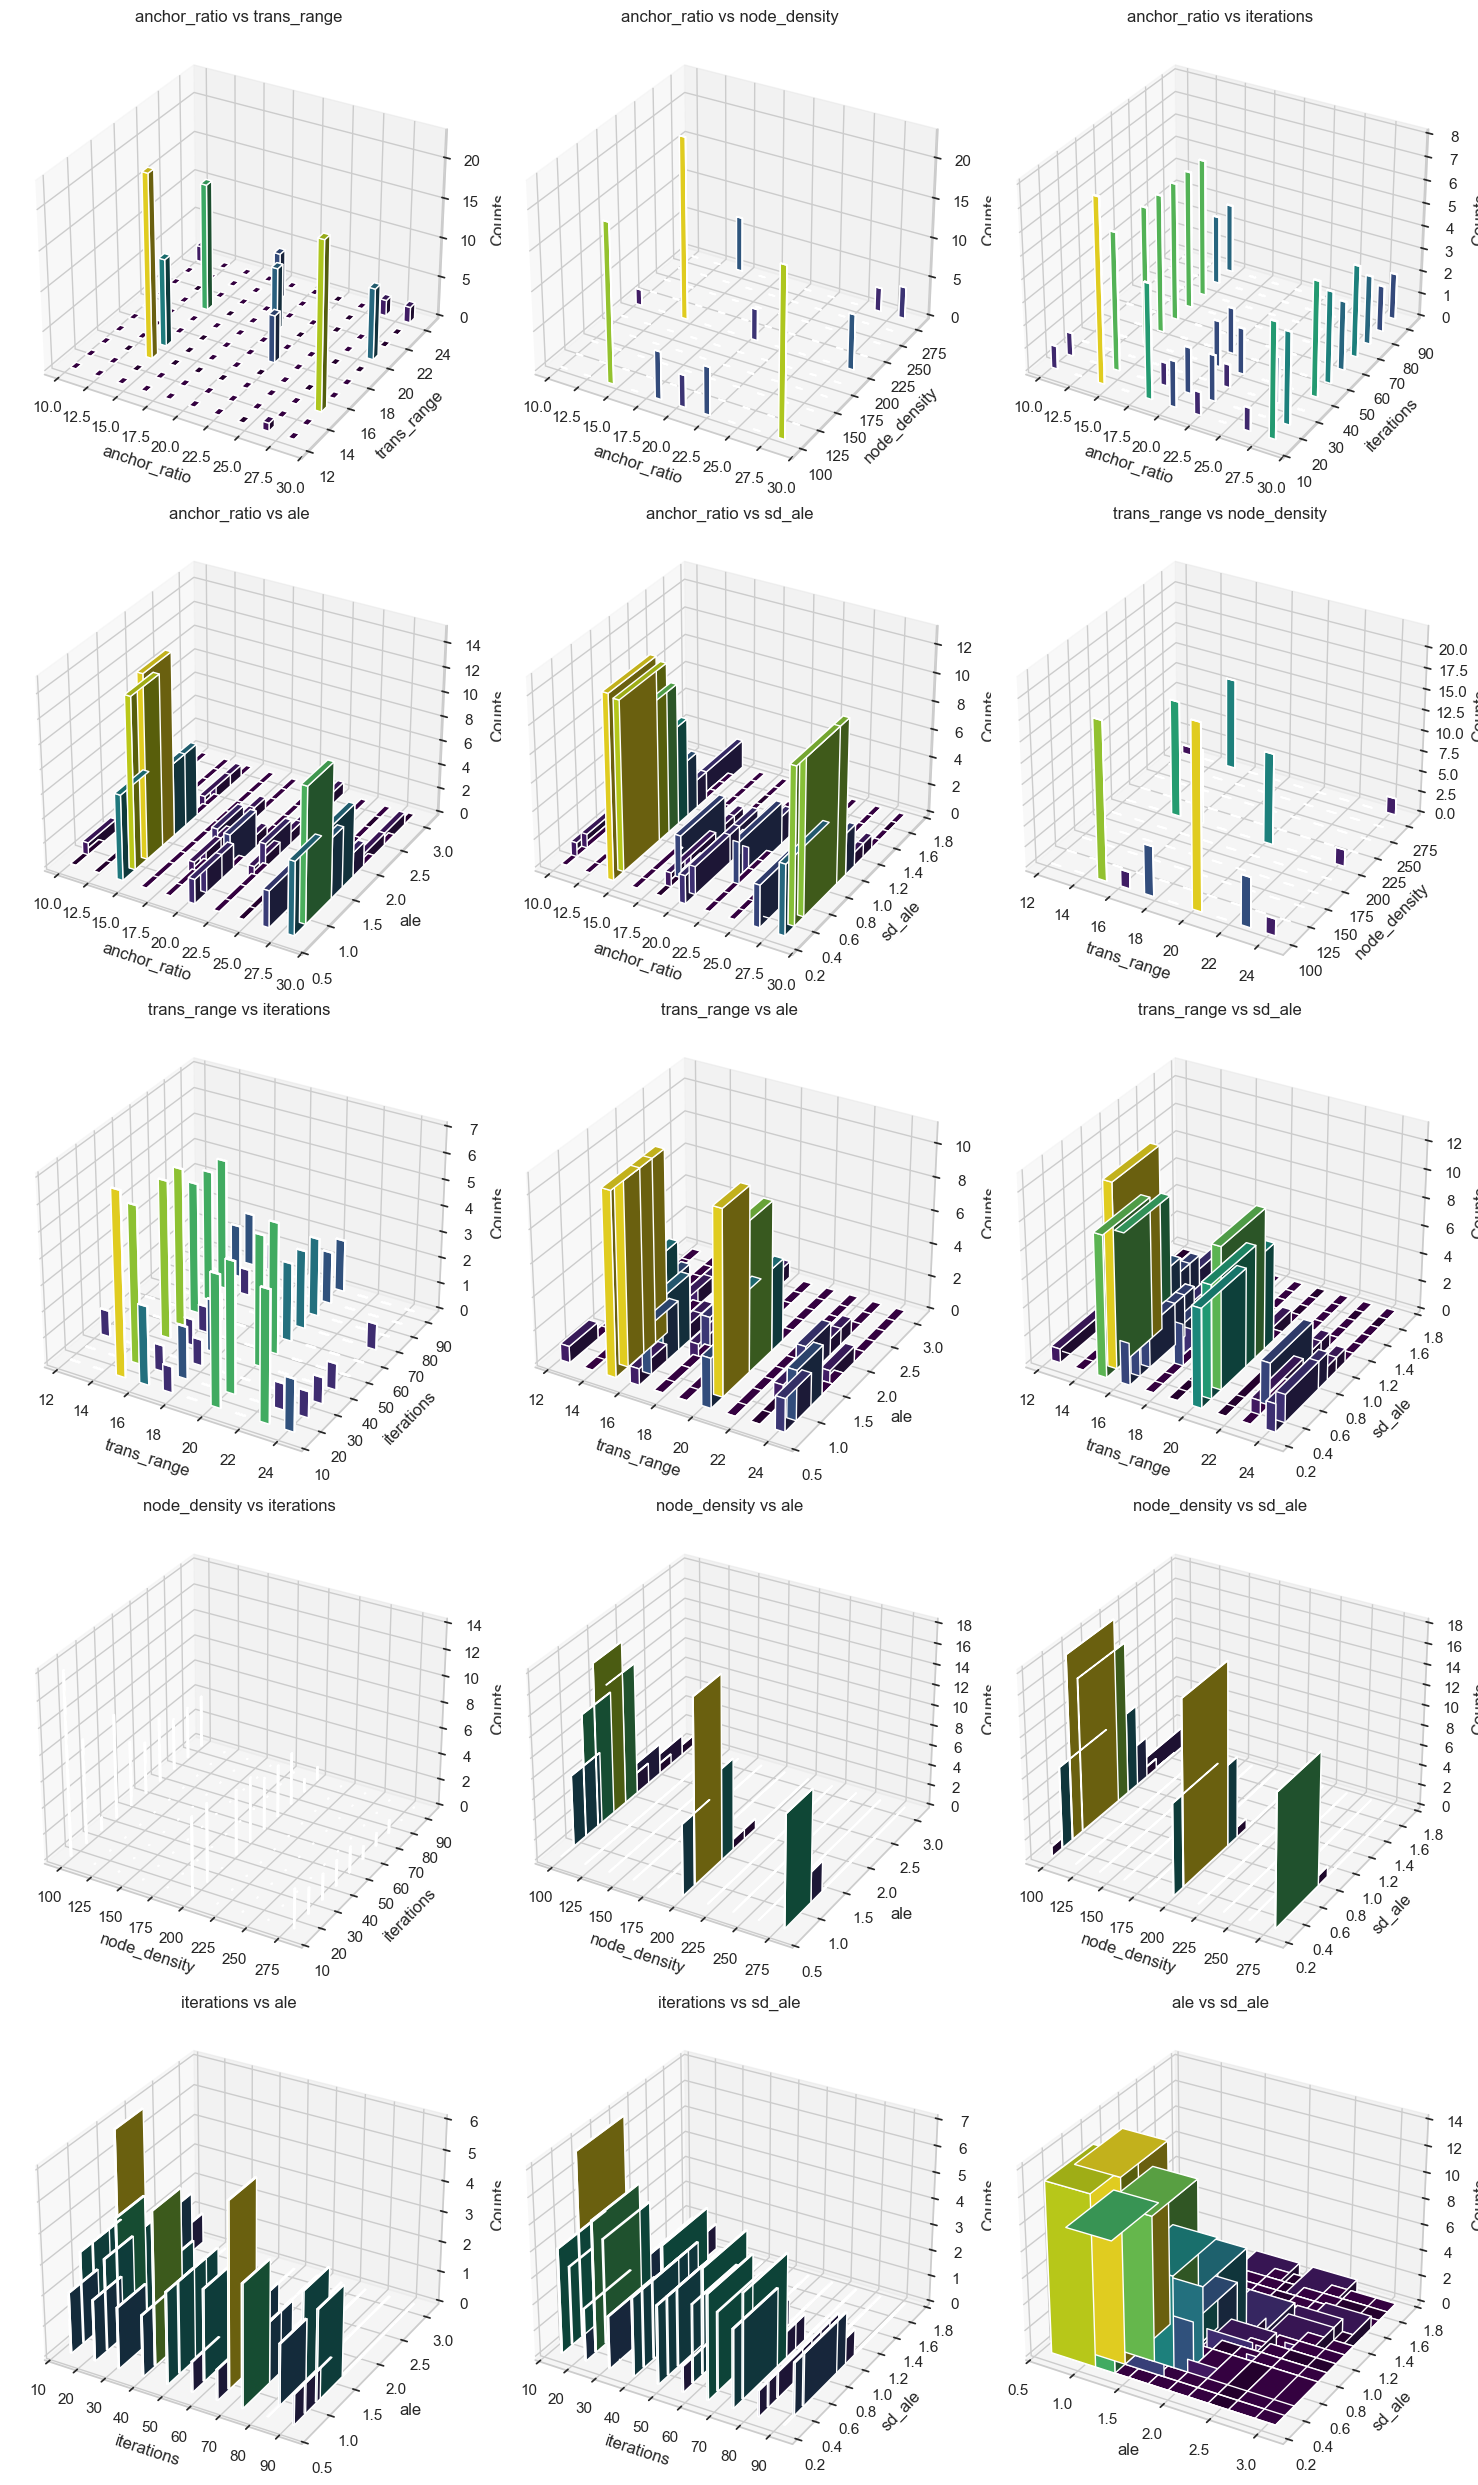

In [11]:
import numpy as np
from itertools import combinations
import warnings

# Function to create a single 3D bar plot
def plot_3d_bar(ax, df, var1, var2, cmap_name='viridis'):
    # Create 2D histogram for the pair of variables
    hist, xedges, yedges = np.histogram2d(df[var1], df[var2], bins=10)

    # Construct positions for bars
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Heights of bars
    dz = hist.ravel()

    # Width and depth of bars
    dx = dy = 0.5 * np.ones_like(dz)

    # Color mapping for bars
    colors = plt.cm.get_cmap(cmap_name)(dz / dz.max() if dz.max() > 0 else dz)  # Normalize heights safely

    # Plot 3D bars
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

    # Labels and Title
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Counts')
    ax.set_title(f'{var1} vs {var2}')

# Generate all combinations of variable pairs
X_columns = df.columns.tolist()  # Replace with specific column names if necessary
combinations_of_columns = list(combinations(X_columns, 2))  # Generate all pairs of columns

# Set up the subplot grid
n_plots = len(combinations_of_columns)
n_cols = 3  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed for the grid

fig = plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Loop through each pair of variables and create subplots
for idx, (var1, var2) in enumerate(combinations_of_columns):
    ax = fig.add_subplot(n_rows, n_cols, idx + 1, projection='3d')
    plot_3d_bar(ax, df, var1, var2)

# Adjust layout and display
plt.tight_layout()
plt.show()

warnings.filterwarnings("ignore")


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize and perform PCA
scaled_features = StandardScaler().fit_transform(df[X_columns])
pca = PCA().fit(scaled_features)

# Scree plot
fig = go.Figure([
    go.Scatter(x=np.arange(1, len(X_columns) + 1), y=pca.explained_variance_ratio_, mode='lines+markers', name='Variance Explained'),
    go.Scatter(x=[1, len(X_columns)], y=[0.1, 0.1], mode='lines', name='Threshold (0.1)', line=dict(color='red', dash='dot'))
])

fig.update_layout(title='Scree Plot', xaxis_title='Principal Component', yaxis_title='Variance Explained', showlegend=True)
fig.show()

# Minimum components for 95% variance
min_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Minimum components for 95% variance: {min_components}')


Minimum components for 95% variance: 5


In [13]:

# Step 1: Prepare data for PCA
features = df[X_columns]  # Use the relevant columns for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Perform PCA
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(scaled_features)

# Step 3: Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 4: Create an interactive biplot using Plotly
fig = go.Figure()

# Plot the PCA scores (scatter plot of the first two principal components)
fig.add_trace(go.Scatter(
    x=pca_scores[:, 0], y=pca_scores[:, 1],
    mode='markers', marker=dict(color='blue', opacity=0.5),
    name='PCA Scores'
))

# Add the PCA loadings (arrows showing the direction of each feature)
for i, var in enumerate(X_columns):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0]], y=[0, loadings[i, 1]],
        mode='lines+text', line=dict(color='red', width=2),
        text=[None, var], textposition='top right',
        name=f'Loading for {var}'
    ))

# Customize the layout and add labels
fig.update_layout(
    title='Biplot of the First Two Principal Components',
    xaxis_title='PC1', yaxis_title='PC2',
    showlegend=False,
    template='plotly_white',
    xaxis=dict(range=[-3, 3]),
    yaxis=dict(range=[-3, 3]),
)

# Show the plot
fig.show()


   ---------------------MODEL-------------------------- 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['sd_ale'],axis=1)
Y = df['sd_ale']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=20,random_state=42)

In [17]:

from sklearn.tree import DecisionTreeRegressor,plot_tree

In [18]:
model = DecisionTreeRegressor()

In [19]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2)


MSE: 0.054986815854274396
R² Score: -1.0360486067248438


--------------BEST PRAMETERS-------------------

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}


In [23]:
model2 = DecisionTreeRegressor(max_depth=3,min_samples_split=2)

In [24]:
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [25]:
y_pred2 = model2.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2)


MSE: 0.03591965038634271
R² Score: -1.0360486067248438


In [ ]:
plt.figure(figsize=(30, 18))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.show()